# Hands on machine learning

## Using perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int32)

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([0], dtype=int32)

-----

## Practice keras

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:] 
X_test = X_test/ 255.0

In [10]:
class_names = ["T-shirt/top", "Trouser", "Plullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

### how to use sequential model

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer('dense_2') is hidden1

False

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[-0.05539512, -0.05999125,  0.03567299, ..., -0.03194989,
        -0.04316743,  0.0447412 ],
       [-0.00535385,  0.07288291,  0.06515029, ..., -0.02197117,
         0.019072  ,  0.05405539],
       [ 0.05108   ,  0.0682057 , -0.05356421, ...,  0.02216989,
        -0.00621285, -0.0182403 ],
       ...,
       [-0.04602948,  0.04492947,  0.01003902, ...,  0.04381679,
         0.00133018, -0.0557267 ],
       [ 0.03123386,  0.07092465,  0.0166029 , ...,  0.01395288,
        -0.02124452, -0.04689126],
       [-0.01839781, -0.02782528, -0.0208708 , ..., -0.07000134,
         0.03072088, -0.06803705]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.7342 - accuracy: 0.7586 - val_loss: 0.5417 - val_accuracy: 0.8130
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4885 - accuracy: 0.8293 - val_loss: 0.4633 - val_accuracy: 0.8426
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4409 - accuracy: 0.8453 - val_loss: 0.4618 - val_accuracy: 0.8282
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4135 - accuracy: 0.8545 - val_loss: 0.3913 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3934 - accuracy: 0.8621 - val_loss: 0.3959 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3778 - accuracy: 0.8660 - val_loss: 0.3733 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3646 - accuracy: 0.8702 - val_loss: 0.3680 - val_accuracy

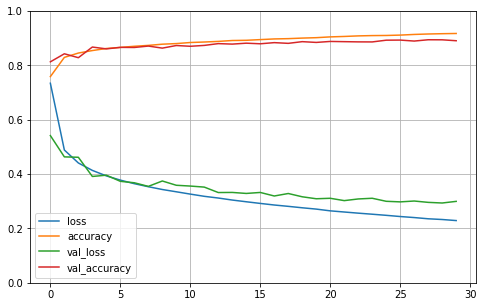

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8796


[0.33159828186035156, 0.8795999884605408]